In [44]:
import pandas as pd
import numpy as np

#model selection
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_validate

#############
#preprocessing

#missing features


#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#oversampling
from imblearn.pipeline import Pipeline #can't use standard Pipeline with SMOTE
from imblearn.over_sampling import SMOTE


####################
#models 
from sklearn.tree import DecisionTreeClassifier

from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LinearRegression


#model_evaluation
from sklearn.metrics import make_scorer, recall_score, precision_score,matthews_corrcoef


In [2]:
df = pd.read_csv("brca_merged_data.csv",index_col= 0)
print(df.shape)
df.head()

(876, 364)


,#Patient Identifier,Sample Identifier,Oncotree Code,Cancer Type,Cancer Type Detailed,Tumor Type,Neoplasm Histologic Grade,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,...,22_mutcount,3_mutcount,4_mutcount,5_mutcount,6_mutcount,7_mutcount,8_mutcount,9_mutcount,X_mutcount,Y_mutcount
0,TCGA-3C-AALI,TCGA-3C-AALI-01,IDC,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,3C,...,9.0,54.0,29.0,32.0,38.0,41.0,32.0,22.0,29.0,NaN
1,TCGA-3C-AALK,TCGA-3C-AALK-01,IDC,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,3C,...,3.0,5.0,2.0,9.0,5.0,2.0,NaN,4.0,4.0,NaN
2,TCGA-4H-AAAK,TCGA-4H-AAAK-01,ILC,Invasive Breast Carcinoma,Breast Invasive Lobular Carcinoma,Infiltrating Lobular Carcinoma,NaN,Yes,No,4H,...,NaN,1.0,3.0,2.0,NaN,2.0,2.0,4.0,3.0,NaN
3,TCGA-5T-A9QA,TCGA-5T-A9QA-01,BRCNOS,Invasive Breast Carcinoma,Breast Invasive Carcinoma (NOS),Other,NaN,Yes,No,5T,...,4.0,8.0,8.0,NaN,3.0,4.0,2.0,2.0,10.0,NaN
4,TCGA-A1-A0SF,TCGA-A1-A0SF-01,IDC,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A1,...,1.0,3.0,6.0,3.0,6.0,6.0,1.0,2.0,1.0,NaN


In [3]:
df.isna().sum()[210:260]

CTNNA1|alpha-Catenin                          876
NKX2-1|TTF1                                   876
CASP3|Caspase-3                               798
CASP9|Caspase-9                               798
PARP1|PARP1                                   798
COPS5|JAB1                                    798
PATIENT_ID                                      0
SUBTYPE                                        79
CANCER_TYPE_ACRONYM                             0
OTHER_PATIENT_ID                                0
AGE                                             0
SEX                                             0
AJCC_PATHOLOGIC_TUMOR_STAGE                     4
AJCC_STAGING_EDITION                          117
DAYS_LAST_FOLLOWUP                             85
DAYS_TO_BIRTH                                  14
DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS            0
ETHNICITY                                     125
FORM_COMPLETION_DATE                            0
HISTORY_NEOADJUVANT_TRTYN                       0


In [4]:
cols = df.columns

print(cols)

Index(['#Patient Identifier', 'Sample Identifier', 'Oncotree Code',
       'Cancer Type', 'Cancer Type Detailed', 'Tumor Type',
       'Neoplasm Histologic Grade', 'Tissue Prospective Collection Indicator',
       'Tissue Retrospective Collection Indicator', 'Tissue Source Site',
       ...
       '22_mutcount', '3_mutcount', '4_mutcount', '5_mutcount', '6_mutcount',
       '7_mutcount', '8_mutcount', '9_mutcount', 'X_mutcount', 'Y_mutcount'],
      dtype='object', length=364)


<AxesSubplot:>

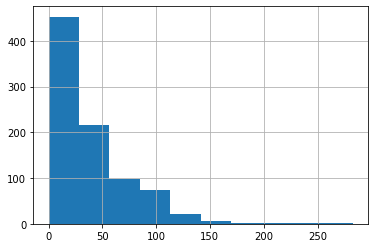

In [5]:
df['OS_MONTHS'].hist()

In [6]:
df['PFS_MONTHS']#.hist(by="OS_STATUS")

0      131.669790
1       47.604958
2       11.440971
3        9.961535
4       48.098103
          ...    
871     11.408094
872     52.963803
873     15.353256
874      5.950620
875    107.045402
Name: PFS_MONTHS, Length: 876, dtype: float64

<AxesSubplot:>

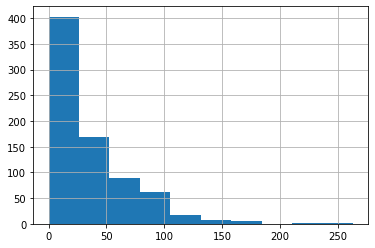

In [7]:
df['DFS_MONTHS'].hist()

# Make list of subset of columns that will need to be modeled

In [8]:
model_cols = list(df.columns[18:209])
model_cols.extend(["AGE","SEX","RACE","TMB (nonsynonymous)"])
model_cols.extend(list(df.columns[248:321]))

In [9]:
#df.columns[248:321]

In [10]:
#df.columns[290:321]

In [11]:
#model_cols

In [12]:
#unsure = [9]

## Questions



In [13]:
#TMB is total number of mutations

#keep_idx = [2,9,11,13,14,16]
#keep = ["Oncotree Code","Tissue Source Site", "Aneuploidy Score","MSI MANTIS Score","TMB (nonsynonymous)"]

#keep all cols between 18:216

In [14]:
#cols_to_drop = [0,1,3,4,5,6,7,8,10,12,15,17]

In [15]:
#df.iloc[:,6]

In [16]:
#df.iloc[:5,250:260]

In [17]:
#'DFS_STATUS', 'DFS_MONTHS', 'PFS_STATUS', 'PFS_MONTHS'

<AxesSubplot:>

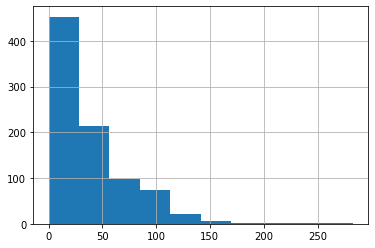

In [18]:
df["DSS_MONTHS"].hist()

In [19]:
df.iloc[:,180:209].isna().sum()

PRDX1|PRDX1                      0
RAB11A RAB11B|Rab11              0
RAB25|Rab25                      0
RPTOR|Raptor                     0
RBM15|RBM15                      0
RICTOR|Rictor                    0
RICTOR|Rictor_pT1135             0
SCD1|SCD1                        0
SRSF1|SF2                        0
WWTR1|TAZ                        0
TIGAR|TIGAR                      0
TGM2|Transglutaminase            0
TFRC|TFRC                        0
TSC1|TSC1                        0
TSC2|Tuberin_pT1462              0
VHL|VHL                          0
XBP1|XBP1                        0
TUBA1B|Acetyl-a-Tubulin-Lys40    0
SQSTM1|p62-LCK-ligand            0
YWHAB|14-3-3_beta                0
YWHAZ|14-3-3_zeta                0
ACVRL1|ACVRL1                    0
DIRAS3|DIRAS3                    0
ANXA1|Annexin-1                  0
PREX1|PREX1                      0
ERCC1|ERCC1                      0
MSH2|MSH2                        0
MSH6|MSH6                        0
DIABLO|Smac         

# Variable Selection

- Patient characteristics
- mutation data
- rppa data
- others?



# Target Variable

- "DSS_STATUS"
- others?


In [20]:
df["DSS_STATUS"].value_counts()
df["DSS_STATUS"].isna().sum()
#notes we are assuming the person dies of cancer
# this might be our only option

19

# Variable Selection

- WEIGHT is missing for all 
- "ETHNICITY" is missing for many "ETHNICITY"

In [21]:
#model_cols.extend(["AGE","Aneuploidy Score","MSI MANTIS Score","TMB (nonsynonymous)","DSS_STATUS"])

In [22]:
df_model = df.loc[:,model_cols]

In [26]:
#remove nonoutcome variables
##'DFS_STATUS', 'DFS_MONTHS', 'PFS_STATUS', 'PFS_MONTHS'

df_model.drop(['DSS_STATUS','DFS_STATUS','PFS_STATUS', 'PFS_MONTHS'],axis=1,inplace=True)

In [27]:
df_model['DSS_MONTHS']

0      131.669790
1       47.604958
2       11.440971
3        9.961535
4       48.098103
          ...    
871     11.408094
872     52.963803
873     15.353256
874    108.064569
875    107.045402
Name: DSS_MONTHS, Length: 876, dtype: float64

In [28]:
df_model.shape

(876, 264)

In [29]:
sum(df_model.isna().sum() > 100)

69

In [30]:
df_model.dropna(axis= 1,thresh=100,inplace=True)

In [32]:
df_model.shape

(876, 202)

# Drop rows with missing outcome variable

In [33]:
df_model.dropna(axis = 0, subset= ["DSS_MONTHS"],inplace=True)

In [34]:
df_model.shape

(875, 202)

# Define X and Y values

In [36]:
# map_dict = {"0:ALIVE OR DEAD TUMOR FREE" : int(0),
#             "1:DEAD WITH TUMOR" : int(1)
#            }


X = df_model.drop(labels= ['DSS_MONTHS'], axis=1)
y = df_model["DSS_MONTHS"]



In [37]:
y.value_counts()

0.000000      11
0.328764      11
12.657396      7
9.994411       5
12.328632      5
              ..
120.327448     1
99.779728      1
118.585002     1
2.761614       1
107.045402     1
Name: DSS_MONTHS, Length: 694, dtype: int64

In [38]:
#get dummy variables

X = pd.get_dummies(X)

# import and start very basic models

https://scikit-learn.org/stable/model_selection.html#model-selection

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((586, 205), (289, 205), (586,), (289,))

In [42]:
X_train

,YWHAE|14-3-3_epsilon,EIF4EBP1|4E-BP1,EIF4EBP1|4E-BP1_pS65,EIF4EBP1|4E-BP1_pT37T46,TP53BP1|53BP1,ACACA ACACB|ACC_pS79,ACACA|ACC1,AKT1 AKT2 AKT3|Akt,AKT1 AKT2 AKT3|Akt_pS473,AKT1 AKT2 AKT3|Akt_pT308,...,PIK3CA,TP53,MUC16,GATA3,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,RACE_Black or African American,RACE_White
198,-0.990314,0.119355,0.039712,0.735198,1.750477,0.220708,1.673489,1.223704,-0.322622,0.083936,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
391,-0.658841,0.248347,-0.434210,0.059213,1.799204,-0.812172,0.515900,1.435814,-0.985808,-0.177287,...,2.0,2.0,NaN,NaN,1,0,0,0,0,1
651,-0.806233,-0.054848,-0.178213,0.441997,2.128327,-0.257106,1.217090,1.076755,-1.055593,-0.318378,...,NaN,NaN,NaN,1.0,1,0,0,0,0,1
603,-1.055014,0.170923,-0.214789,0.514688,1.387882,0.355671,1.463838,1.324748,-1.299753,-0.553271,...,1.0,NaN,NaN,NaN,1,0,0,0,0,1
862,-0.861629,0.171360,0.958391,1.057411,2.902037,-0.468534,1.232014,0.426919,-2.130823,-0.860812,...,NaN,1.0,NaN,NaN,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-0.742803,1.173798,-0.188263,0.401892,1.607271,-0.012225,1.110279,0.390308,-1.656083,-0.743574,...,NaN,1.0,NaN,NaN,1,0,0,0,1,0
192,-0.809559,-0.304298,0.000493,0.530625,2.296848,1.390886,2.725905,1.124609,-0.216770,0.293507,...,NaN,NaN,NaN,NaN,1,0,0,0,0,1
630,-0.924149,0.848702,0.029614,1.310954,1.715180,1.030785,2.409577,0.786120,-0.404081,0.219128,...,NaN,1.0,NaN,NaN,1,0,0,0,0,1
560,-0.982632,0.928159,0.231837,1.237008,2.151961,1.939708,3.183966,1.339294,0.897570,1.688426,...,NaN,NaN,NaN,NaN,1,0,0,0,0,1


# Preprocessing

- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

- Imputing missing_data  https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values
- https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py
- scaling data
- PCA (on mutations things like that) or combine them all into one... This would reduce interpretability?
- SMOTE imbalanced dataset
- polynomial features
- enhanced variable selection? ENET or other automated option https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

# Modeling

- Decision Tree 
- KNN
- logistic regression
- gradient boosting
- ensemble
- others

# Model Evaluation

# PIPELINE DEFINE

In [213]:
sensitivity = make_scorer(recall_score, pos_label=1)
specificity = make_scorer(recall_score, pos_label=0)
PPV = make_scorer(precision_score, pos_label=1)
NPV = make_scorer(precision_score, pos_label=0)
MCC = make_scorer(matthews_corrcoef)
score_metrics = {'roc_auc':'roc_auc','accuracy':'accuracy','MCC':MCC,
                 'bal_acc':'balanced_accuracy', 'sensitivity' : sensitivity,
                 'specificity': specificity,'PPV': PPV, 'NPV' : NPV, 'f1':'f1'}

In [54]:
reg_metric = {'rmse' : 'neg_mean_squared_error',
              'r2': 'r2',
              'neg_MAE': "neg_mean_absolute_error"
             }

In [55]:
# define pipeline


imp = SimpleImputer(strategy="most_frequent") #IterativeImputer(max_iter=100, random_state=0)
scale = StandardScaler()
#over = SMOTE(random_state=0)

model = LinearRegression()

#defining steps in pipeline
steps = [('impute',imp),('scale', scale), ('model', model)]
pipeline = Pipeline(steps=steps, verbose=3)



In [56]:
scores = cross_validate(pipeline, X_train, y_train, cv=10,
                        scoring=reg_metric,
                        return_train_score=False, 
                        verbose=1,n_jobs=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.1s finished


In [57]:
#Evaluate the model
# scores = cross_validate(pipeline, X_train, y_train, cv=10,
#                         scoring=score_metrics,
#                         return_train_score=False, 
#                         verbose=1,n_jobs=5)

In [58]:
score_df = pd.DataFrame(scores)

In [59]:
score_df.describe()

,fit_time,score_time,test_rmse,test_r2,test_neg_MAE
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.045902,0.004800,-919.174110,0.243465,-21.233572
std,0.004515,0.000789,349.970001,0.243892,3.287524
min,0.038378,0.003998,-1695.302303,-0.156360,-27.209455
25%,0.042908,0.004001,-1127.559201,0.122582,-23.508324
50%,0.047500,0.004999,-765.591699,0.183716,-19.938838
75%,0.049315,0.005001,-678.961015,0.427178,-18.560164
max,0.051000,0.006000,-606.391220,0.613214,-17.862607


In [195]:
#generate CI 

score_df_U95CI = score_df.describe().loc['mean'] + 1.96 * (score_df.describe().loc['std']/ np.sqrt(score_df.describe().loc['count']))
score_df_L95CI = score_df.describe().loc['mean'] - 1.96 * (score_df.describe().loc['std']/ np.sqrt(score_df.describe().loc['count']))

In [196]:
score_sum = dict()
for item in score_df.describe().columns:
    mean = round(score_df.describe()[item]['mean'],3)
    L95 = round(score_df_U95CI[item],3)
    U95 = round(score_df_L95CI[item],3)
    score_sum[item]= ((f'{mean}({L95}-{U95})'))
    
score_summary = pd.Series(score_sum)


In [197]:
score_summary

fit_time               3.668(3.805-3.531)
score_time              0.02(0.022-0.018)
test_roc_auc           0.542(0.619-0.464)
test_accuracy          0.905(0.916-0.895)
test_MCC            -0.032(-0.017--0.046)
test_bal_acc           0.491(0.496-0.485)
test_sensitivity             0.0(0.0-0.0)
test_specificity        0.981(0.992-0.97)
test_PPV                     0.0(0.0-0.0)
test_NPV               0.921(0.925-0.917)
test_f1                      0.0(0.0-0.0)
dtype: object